In [1]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
import tensorflow as tf
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

In [2]:
images_train_directory = '../images/bf/train'
images_val_directory = '../images/bf/validation'
images_test_directory = '../images/bf/test'

batch_size = 32
img_size = (256, 256)

In [3]:
class_names = ['back', 'front']

train_ds = tf.keras.utils.image_dataset_from_directory(
  images_train_directory,
  class_names=class_names,
  seed=123,
  image_size=img_size,
  batch_size=batch_size
)

val_ds = tf.keras.utils.image_dataset_from_directory(
  images_val_directory,
  class_names=class_names,
  shuffle=False,
  image_size=img_size,
  batch_size=batch_size
)

test_ds = tf.keras.utils.image_dataset_from_directory(
  images_test_directory,
  class_names=class_names,
  shuffle=False,
  image_size=img_size,
  batch_size=batch_size
)     

Found 6703 files belonging to 2 classes.
Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-11-29 10:36:36.067081: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-29 10:36:36.067221: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Found 400 files belonging to 2 classes.
Found 600 files belonging to 2 classes.


In [4]:
REGULARIZATION_LAMBDA = 0.000025

ic_model = tf.keras.models.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(256, 256, 3)),
    tf.keras.layers.Conv2D(32, (4,4), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (4,4), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (4,4), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2048, activation='relu', activity_regularizer=tf.keras.regularizers.l2(REGULARIZATION_LAMBDA)),
    tf.keras.layers.Dense(1024, activation='relu', activity_regularizer=tf.keras.regularizers.l2(REGULARIZATION_LAMBDA)),
    tf.keras.layers.Dense(1024, activation='relu', activity_regularizer=tf.keras.regularizers.l2(REGULARIZATION_LAMBDA)),
    tf.keras.layers.Dense(1024, activation='relu', activity_regularizer=tf.keras.regularizers.l2(REGULARIZATION_LAMBDA)),
    tf.keras.layers.Dense(1024, activation='relu', activity_regularizer=tf.keras.regularizers.l2(REGULARIZATION_LAMBDA)),
    tf.keras.layers.Dense(1024, activation='relu', activity_regularizer=tf.keras.regularizers.l2(REGULARIZATION_LAMBDA)),
    tf.keras.layers.Dense(1024, activation='relu', activity_regularizer=tf.keras.regularizers.l2(REGULARIZATION_LAMBDA)),
    tf.keras.layers.Dense(1024, activation='relu', activity_regularizer=tf.keras.regularizers.l2(REGULARIZATION_LAMBDA)),
    tf.keras.layers.Dense(1024, activation='relu', activity_regularizer=tf.keras.regularizers.l2(REGULARIZATION_LAMBDA)),
    tf.keras.layers.Dense(1024, activation='relu', activity_regularizer=tf.keras.regularizers.l2(REGULARIZATION_LAMBDA)),
    tf.keras.layers.Dense(1024, activation='relu', activity_regularizer=tf.keras.regularizers.l2(REGULARIZATION_LAMBDA)),
    tf.keras.layers.Dense(1024, activation='relu', activity_regularizer=tf.keras.regularizers.l2(REGULARIZATION_LAMBDA)),
    tf.keras.layers.Dense(1024, activation='relu', activity_regularizer=tf.keras.regularizers.l2(REGULARIZATION_LAMBDA)),
    tf.keras.layers.Dense(1024, activation='relu', activity_regularizer=tf.keras.regularizers.l2(REGULARIZATION_LAMBDA)),
    tf.keras.layers.Dense(1024, activation='relu', activity_regularizer=tf.keras.regularizers.l2(REGULARIZATION_LAMBDA)),
    tf.keras.layers.Dense(512, activation='relu', activity_regularizer=tf.keras.regularizers.l2(REGULARIZATION_LAMBDA)),
    tf.keras.layers.Dense(64, activation='relu', activity_regularizer=tf.keras.regularizers.l2(REGULARIZATION_LAMBDA)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
  initial_learning_rate=0.001,
  decay_steps=10000,
  decay_rate=0.9
  )

ic_model.compile(
  loss='binary_crossentropy',
  optimizer=tf.optimizers.SGD(learning_rate=lr_schedule),
  metrics=['accuracy'],
)

ic_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 253, 253, 32)      1568      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 123, 123, 32)      16416     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 61, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 58, 58, 64)        3

In [5]:
ic_model.evaluate(val_ds)

2022-11-29 10:36:36.915161: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-11-29 10:36:37.145933: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


13/13 [==============================] - 1s 59ms/step - loss: 0.6937 - accuracy: 0.5100


[0.6936923265457153, 0.5099999904632568]

In [6]:
ic_model.load_weights('./models/bf_model_w_v4.h5')

In [7]:
ic_model.evaluate(val_ds)

13/13 [==============================] - 1s 51ms/step - loss: 0.0996 - accuracy: 0.9750


[0.0996251255273819, 0.9749999642372131]

In [8]:
# predicitons and true values over the validation set
ic_validations_labels = np.array(list(map(lambda x: x[1], val_ds.unbatch().as_numpy_iterator())))
ic_predictions = ic_model.predict(val_ds).reshape(-1)

 3/13 [=====>........................] - ETA: 0s

2022-11-29 10:36:40.279548: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


13/13 [==============================] - 1s 47ms/step


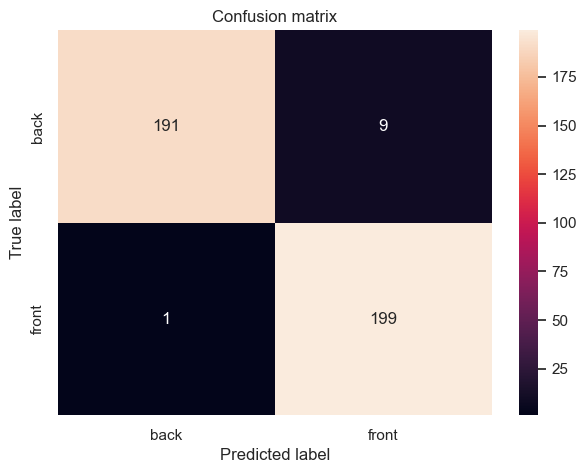

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))

# confusion matrix
ic_cm_old = confusion_matrix(ic_validations_labels, ic_predictions > 0.5)

sns.heatmap(ic_cm_old, annot=True, fmt="d", ax=ax)
ax.set_ylabel('True label')
ax.set_xlabel('Predicted label')
ax.set_xticklabels(val_ds.class_names)
ax.set_yticklabels(val_ds.class_names)
ax.set_title("Confusion matrix")

plt.show()

In [10]:
ic_model.evaluate(test_ds)

19/19 [==============================] - 1s 67ms/step - loss: 0.0575 - accuracy: 0.9817


[0.057508278638124466, 0.9816666841506958]

In [11]:
ic_test_predictions = ic_model.predict(test_ds)
ic_test_labels = np.array(list(map(lambda x: x[1], test_ds.unbatch().as_numpy_iterator())))

19/19 [==============================] - 1s 50ms/step


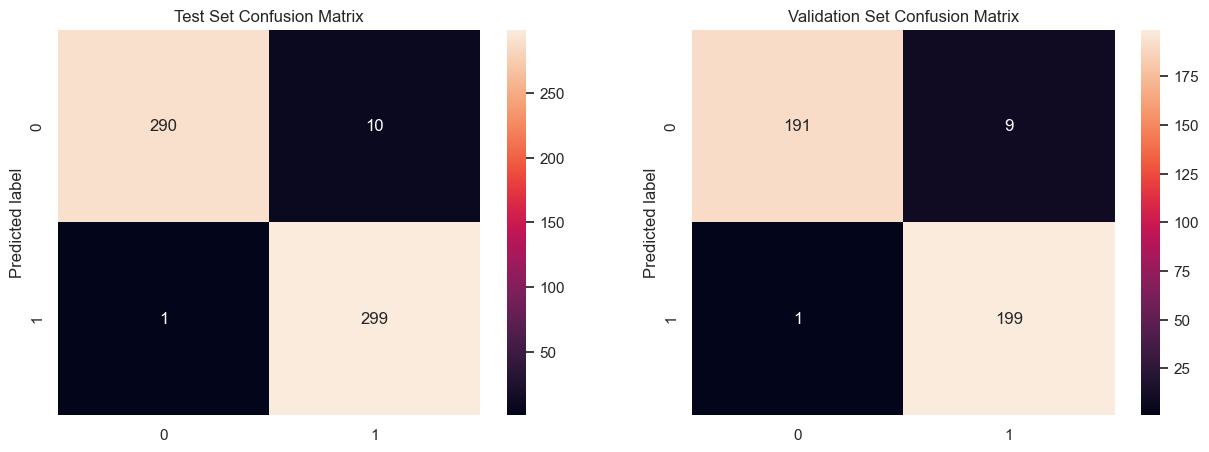

In [12]:
new_label_predictions = np.zeros(ic_test_predictions.shape)
thresholld = 0.5
for idx, row in enumerate(ic_test_predictions):
  new_label_predictions[idx] = 1 if row > thresholld else 0

ic_test_cm = confusion_matrix(ic_test_labels, new_label_predictions)
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.heatmap(ic_test_cm, annot=True, fmt="d", ax=ax[0])
ax[0].set_title('Test Set Confusion Matrix')
ax[0].set_ylabel('Actual label')
ax[0].set_ylabel('Predicted label')

sns.heatmap(ic_cm_old, annot=True, fmt="d", ax=ax[1])
ax[1].set_title('Validation Set Confusion Matrix')
ax[1].set_ylabel('Actual label')
ax[1].set_ylabel('Predicted label')

plt.show()